<a href="https://colab.research.google.com/github/amirhosseinTeimory/amirhosseinTeimory/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics


In [ ]:
data1 = pd.read_csv("/content/data.csv")
data1.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [ ]:
la = LabelEncoder()
data1["Personality"] = la.fit_transform(data1["Personality"])
data1["Interest"] = la.fit_transform(data1["Interest"])
data1["Gender"] = data1["Gender"].map({"Male":0,"Female":1})
data1.to_excel(/content/sample_data, index=False)

SyntaxError: invalid syntax (<ipython-input-12-0d7f0744cf89>, line 5)

In [ ]:
data1.isnull().sum()

,0
Age,0
Gender,0
Education,0
Introversion Score,0
Sensing Score,0
Thinking Score,0
Judging Score,0
Interest,0
Personality,0


In [ ]:
x = data1.drop(["Personality"] , axis = 1)
y = data1["Personality"]

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [ ]:
model_tree = DecisionTreeClassifier()
model_tree= model_tree.fit(x_train,y_train)
y_pred = model_tree.predict(x_test)
y_pred

array([3, 9, 1, ..., 1, 2, 1])

[Text(0.5792246587478171, 0.9878048780487805, 'x[5] <= 5.502\ngini = 0.83\nsamples = 102448\nvalue = [3117.0, 27503.0, 2236.0, 19766.0, 430.0, 3843.0, 316.0\n2682.0, 2369.0, 19756.0, 1567.0, 13718.0, 290.0, 2762.0\n200.0, 1893.0]'),
 Text(0.336231677543636, 0.9634146341463414, 'x[3] <= 4.599\ngini = 0.682\nsamples = 56547\nvalue = [2888.0, 25581.0, 46.0, 506.0, 409.0, 3566.0, 3.0, 68.0\n2180.0, 18169.0, 23.0, 263.0, 261.0, 2543.0, 5.0, 36.0]'),
 Text(0.4577281681457266, 0.975609756097561, 'True  '),
 Text(0.21306018957635917, 0.9390243902439024, 'x[4] <= 6.1\ngini = 0.529\nsamples = 26095\nvalue = [305.0, 2758.0, 8.0, 83.0, 45.0, 389.0, 0.0, 11.0\n2087.0, 17395.0, 23.0, 263.0, 239.0, 2448.0, 5.0, 36.0]'),
 Text(0.13388812232091762, 0.9146341463414634, 'x[6] <= 6.0\ngini = 0.402\nsamples = 21004\nvalue = [285, 2530, 8, 80, 0, 0, 0, 0, 1912, 15924, 22\n243, 0, 0, 0, 0]'),
 Text(0.06951464129571351, 0.8902439024390244, 'x[3] <= 3.6\ngini = 0.29\nsamples = 17885\nvalue = [51, 2376, 0, 72, 

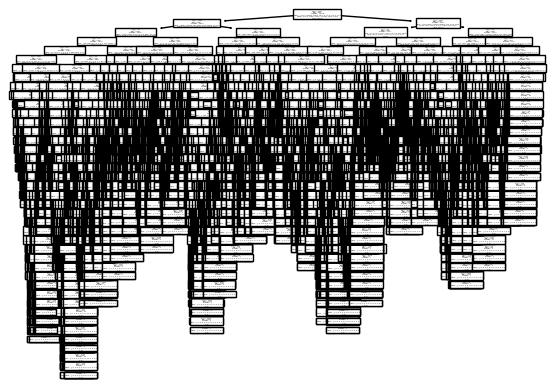

In [ ]:
tree.plot_tree(model_tree)

In [ ]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.8739702494826845

In [ ]:
model_tree.score(x_test,y_test)

0.8739702494826845

In [ ]:
model_tree = DecisionTreeClassifier(criterion="entropy" , max_depth=3)
model_tree= model_tree.fit(x_train,y_train)
y_pred = model_tree.predict(x_test)
y_pred

array([ 3, 11,  1, ...,  1,  3,  1])

In [ ]:
model_tree.score(x_test,y_pred)

1.0

[Text(0.5, 0.875, 'x[5] <= 5.501\nentropy = 2.968\nsamples = 102448\nvalue = [3117.0, 27503.0, 2236.0, 19766.0, 430.0, 3843.0, 316.0\n2682.0, 2369.0, 19756.0, 1567.0, 13718.0, 290.0, 2762.0\n200.0, 1893.0]'),
 Text(0.25, 0.625, 'x[3] <= 4.599\nentropy = 2.113\nsamples = 56529\nvalue = [2888.0, 25580.0, 45.0, 504.0, 409.0, 3565.0, 3.0, 67.0\n2180.0, 18162.0, 23.0, 261.0, 261.0, 2542.0, 5.0, 34.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 6.1\nentropy = 1.713\nsamples = 26088\nvalue = [305, 2760, 8, 83, 45, 389, 0, 11, 2087, 17390, 23\n261, 240, 2447, 5, 34]'),
 Text(0.0625, 0.125, 'entropy = 1.189\nsamples = 20998\nvalue = [285.0, 2531.0, 8.0, 80.0, 0.0, 0.0, 0.0, 0.0, 1912.0\n15919.0, 22.0, 241.0, 0.0, 0.0, 0.0, 0.0]'),
 Text(0.1875, 0.125, 'entropy = 2.094\nsamples = 5090\nvalue = [20.0, 229.0, 0.0, 3.0, 45.0, 389.0, 0.0, 11.0, 175.0\n1471.0, 1.0, 20.0, 240.0, 2447.0, 5.0, 34.0]'),
 Text(0.375, 0.375, 'x[4] <= 6.1\nentropy = 1.339\nsamples = 30441\nvalue = [2583, 2

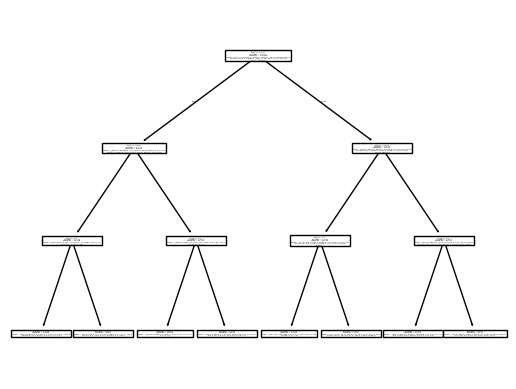

In [ ]:
tree.plot_tree(model_tree)